In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

churn = pd.read_csv('../data/churn.csv')


In [2]:

print("Shape of dataset:", churn.shape)
print("\nColumn names:\n", churn.columns.tolist())
print("\nData types:\n", churn.dtypes)
print("\nFirst 5 rows:\n", churn.head())


Shape of dataset: (7043, 21)

Column names:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

First 5 rows:


In [3]:
churn['TotalCharges'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
print(churn['TotalCharges'].loc[churn['TotalCharges'] == ' '].value_counts())

TotalCharges
     11
Name: count, dtype: int64


In [8]:
churn['TotalCharges'] = churn['TotalCharges'].replace(' ', np.nan).astype(float)

# Drop missing rows
churn.dropna(subset=['TotalCharges'], inplace=True)

In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [13]:
churn.shape

(7032, 21)

In [14]:
print(churn.describe())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


#Churn distribution

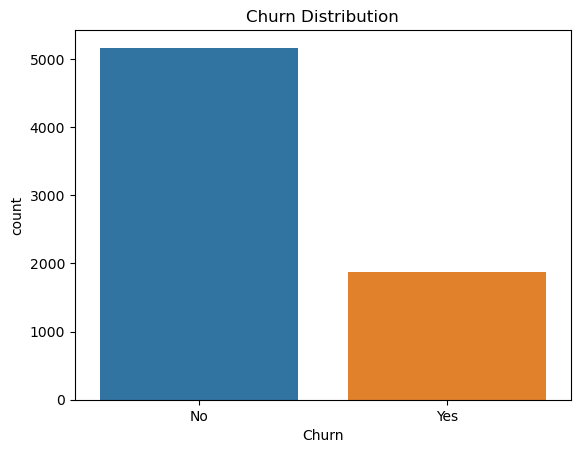

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [15]:
sns.countplot(x='Churn', data=churn)
plt.title('Churn Distribution')
plt.show()

churn['Churn'].value_counts(normalize=True)

#Feature-by-Feature Churn Relationship

<Axes: xlabel='gender', ylabel='count'>

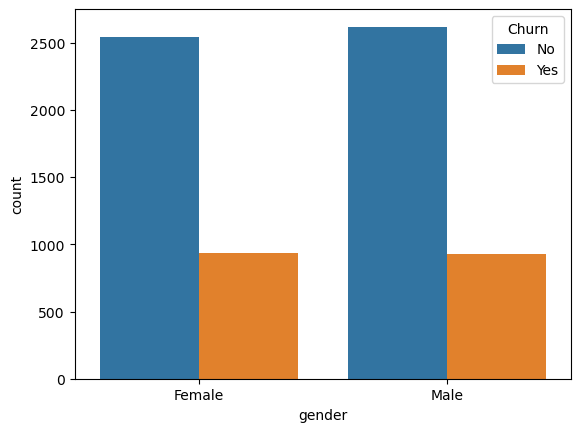

In [16]:
sns.countplot(x='gender', hue='Churn', data=churn)


<Axes: xlabel='SeniorCitizen', ylabel='count'>

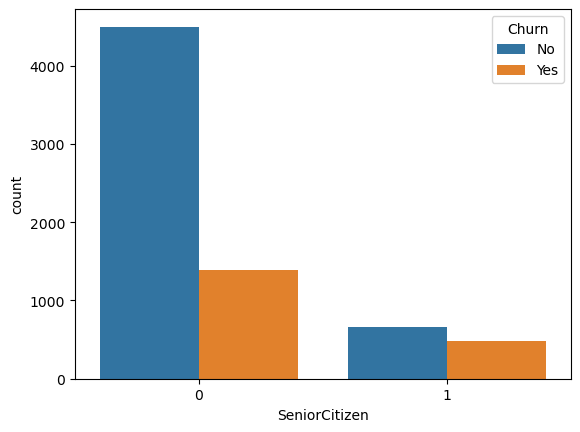

In [17]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=churn)

<Axes: xlabel='Dependents', ylabel='count'>

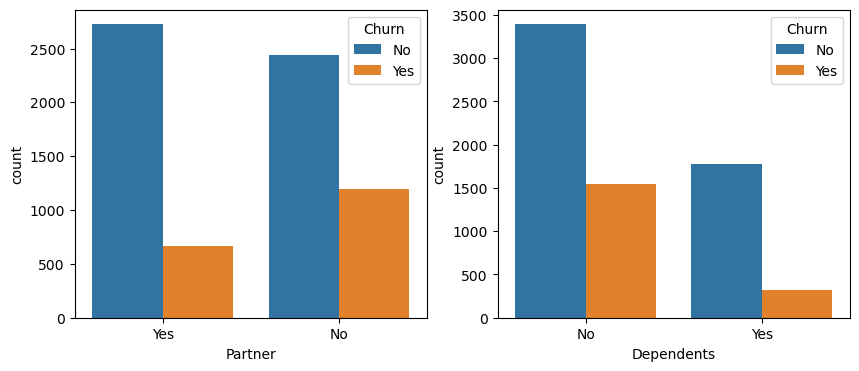

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.countplot(x='Partner', hue='Churn', data=churn, ax=ax[0])
sns.countplot(x='Dependents', hue='Churn', data=churn, ax=ax[1])


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Count'>

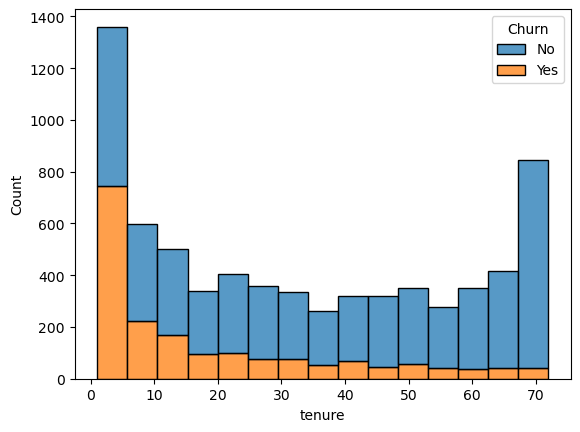

In [19]:
sns.histplot(x='tenure', hue='Churn', data=churn, multiple='stack')


<Axes: xlabel='Contract', ylabel='count'>

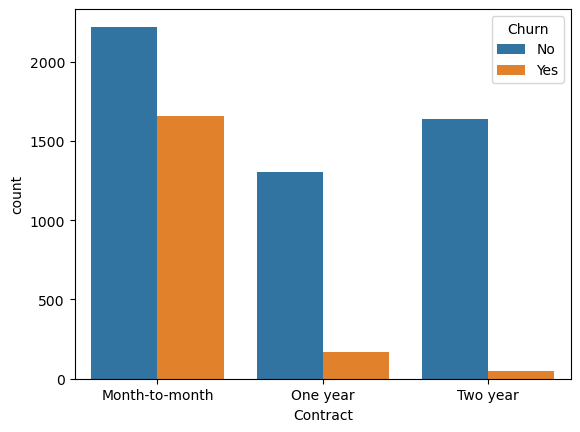

In [20]:
sns.countplot(x='Contract', hue='Churn', data=churn)


<Axes: xlabel='count', ylabel='PaymentMethod'>

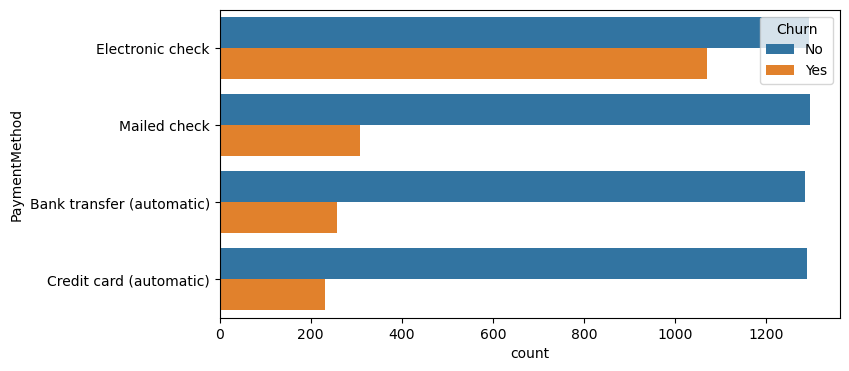

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(y='PaymentMethod', hue='Churn', data=churn)


<Axes: xlabel='InternetService', ylabel='count'>

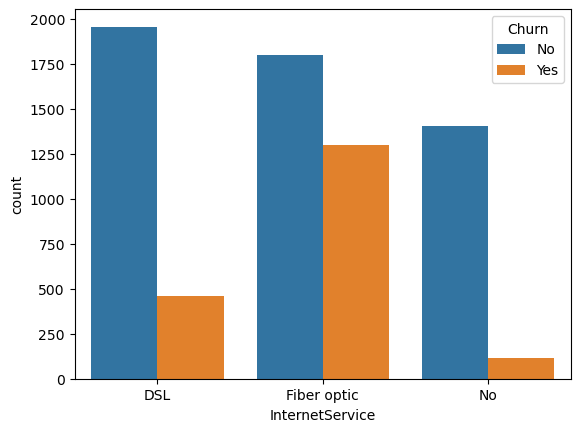

In [22]:
sns.countplot(x='InternetService', hue='Churn', data=churn)


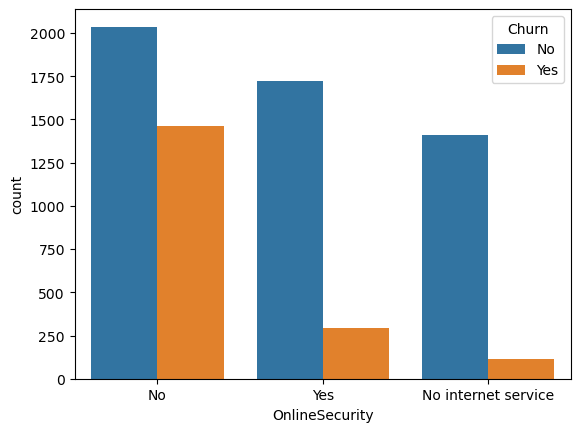

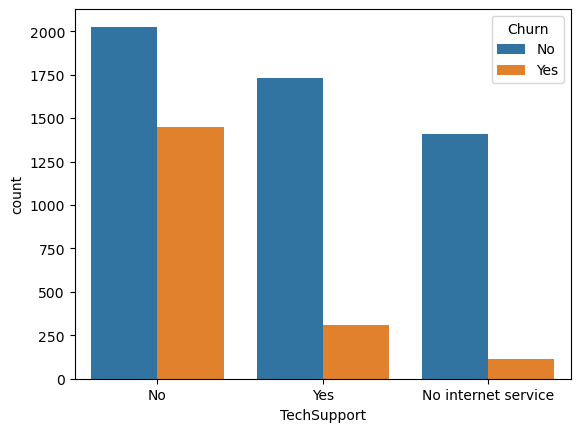

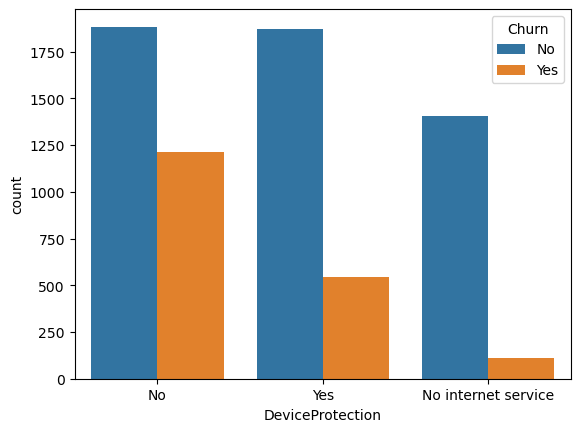

In [23]:
features = ['OnlineSecurity', 'TechSupport', 'DeviceProtection']
for col in features:
    sns.countplot(x=col, hue='Churn', data=churn)
    plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

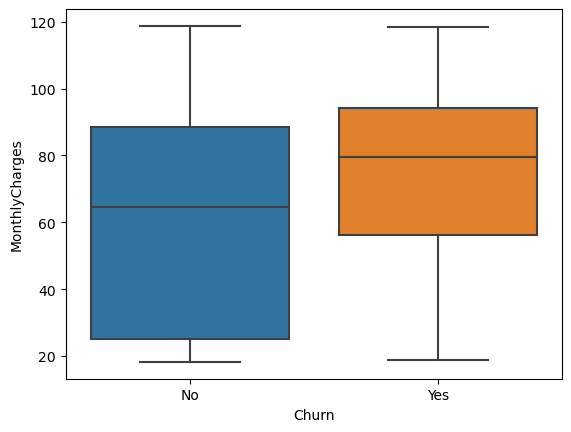

In [24]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn)


<Axes: >

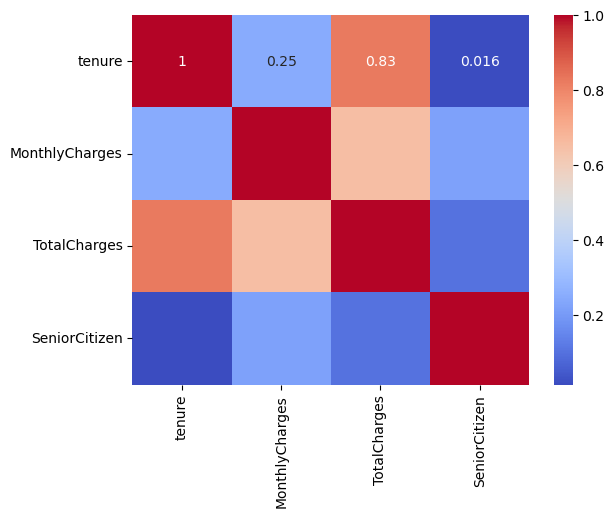

In [25]:
corr = churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


#Correlation and Feature Importance

In [28]:
# Convert target to binary
churn['Churn_flag'] = churn['Churn'].map({'Yes':1, 'No':0})

# Convert categorical variables to numeric using get_dummies
encoded = pd.get_dummies(churn.drop(['customerID','Churn'], axis=1), drop_first=True)

# Correlation with churn
corr = encoded.corr()['Churn_flag'].sort_values(ascending=False)
corr.head(30)


Churn_flag                               1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='tenure_group', ylabel='Churn_flag'>

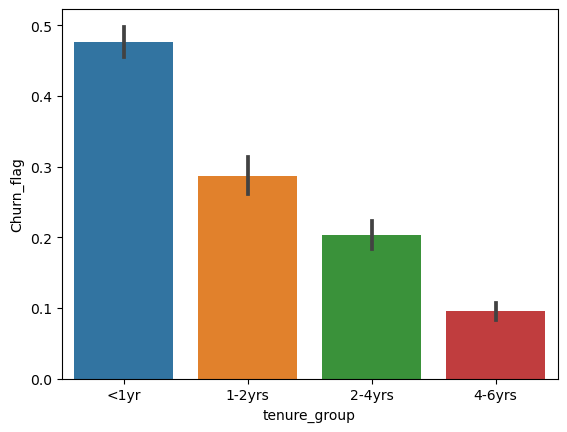

In [29]:
churn['tenure_group'] = pd.cut(churn['tenure'], bins=[0,12,24,48,72], labels=['<1yr','1-2yrs','2-4yrs','4-6yrs'])
sns.barplot(x='tenure_group', y='Churn_flag', data=churn)


<Axes: xlabel='Contract', ylabel='MonthlyCharges'>

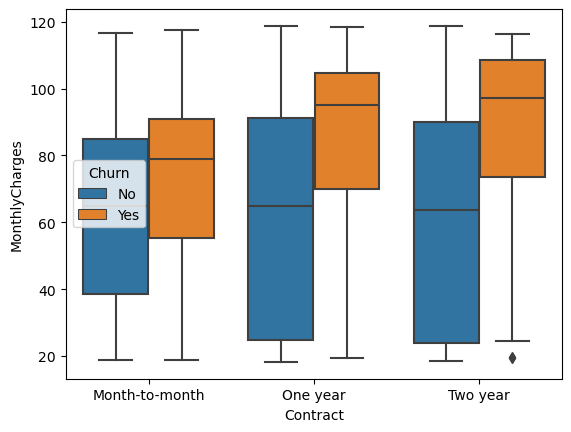

In [30]:
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=churn)


In [31]:
cols = ['InternetService','OnlineSecurity','OnlineBackup','TechSupport']
for c in cols:
    churn_rate = churn.groupby(c)['Churn_flag'].mean().sort_values(ascending=False)
    print(f"{c}:\n{churn_rate}\n")


InternetService:
InternetService
Fiber optic    0.418928
DSL            0.189983
No             0.074342
Name: Churn_flag, dtype: float64

OnlineSecurity:
OnlineSecurity
No                     0.417787
Yes                    0.146402
No internet service    0.074342
Name: Churn_flag, dtype: float64

OnlineBackup:
OnlineBackup
No                     0.399417
Yes                    0.215670
No internet service    0.074342
Name: Churn_flag, dtype: float64

TechSupport:
TechSupport
No                     0.416475
Yes                    0.151961
No internet service    0.074342
Name: Churn_flag, dtype: float64



In [32]:
churn.groupby('PaymentMethod')['Churn_flag'].mean().sort_values(ascending=False)


PaymentMethod
Electronic check             0.452854
Mailed check                 0.192020
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Name: Churn_flag, dtype: float64

In [33]:
churn.groupby(['Partner','Dependents'])['Churn_flag'].mean()


Partner  Dependents
No       No            0.342378
         Yes           0.214485
Yes      No            0.254083
         Yes           0.143103
Name: Churn_flag, dtype: float64

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

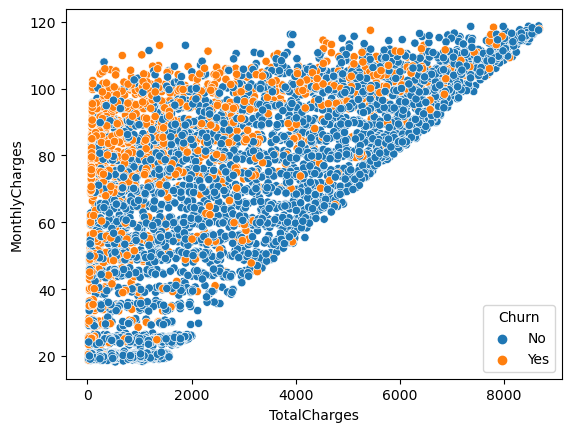

In [34]:
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Churn', data=churn)


In [35]:
pd.crosstab(churn['InternetService'], churn['Contract'], margins=True, normalize='index')


Contract,Month-to-month,One year,Two year
InternetService,,,
DSL,0.506209,0.235927,0.257864
Fiber optic,0.687339,0.174096,0.138566
No,0.344737,0.238816,0.416447
All,0.551052,0.209329,0.239619


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = encoded.drop('Churn_flag', axis=1)
y = encoded['Churn_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10)


TotalCharges                      0.185866
tenure                            0.175922
MonthlyCharges                    0.173959
InternetService_Fiber optic       0.040179
PaymentMethod_Electronic check    0.034098
Contract_Two year                 0.029941
gender_Male                       0.027262
OnlineSecurity_Yes                0.026201
PaperlessBilling_Yes              0.025882
TechSupport_Yes                   0.025109
dtype: float64

In [37]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# --- Data prep ---
X = encoded.drop('Churn_flag', axis=1)
y = encoded['Churn_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numeric features (optional for logistic)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# --- 1️⃣ Logistic Regression (Baseline) ---
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]

# --- 2️⃣ Random Forest (Advanced) ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# --- Metrics ---
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n🔹 {model_name} Performance:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred),3))
    print("Precision:", round(precision_score(y_true, y_pred),3))
    print("Recall:", round(recall_score(y_true, y_pred),3))
    print("F1-score:", round(f1_score(y_true, y_pred),3))
    print("ROC-AUC:", round(roc_auc_score(y_true, y_prob),3))

evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

# Add churn probability for deployment insight
predicted = X_test.copy()
predicted['Actual Churn'] = y_test.values
predicted['Predicted Probability (RF)'] = y_prob_rf
predicted['Predicted Churn'] = y_pred_rf
predicted[['Predicted Probability (RF)', 'Predicted Churn']].head()



🔹 Logistic Regression Performance:
Accuracy: 0.806
Precision: 0.657
Recall: 0.567
F1-score: 0.609
ROC-AUC: 0.838

🔹 Random Forest Performance:
Accuracy: 0.785
Precision: 0.625
Recall: 0.476
F1-score: 0.54
ROC-AUC: 0.817


,Predicted Probability (RF),Predicted Churn
4221,0.015,0
1820,0.250,0
2375,0.025,0
5462,0.085,0
1791,0.030,0
